**Ridge and Lasso**

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fbourgey/fre-gy-7773-mlfe/blob/main/04_ridge_lasso.ipynb)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler, add_dummy_feature
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import KFold
from utils.mse import cv_mse
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

sns.set_theme("talk")
sns.set_style("whitegrid")
mpl.rcParams["figure.figsize"] = (8, 6)

# Ridge regression example

[sklearn - Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [3]:
# generate noisy and small dataset
rng = np.random.default_rng(seed=42)
m = 20  # number of instances
noise = rng.standard_normal((m, 1)) / 1.5
X = 3 * rng.random((m, 1))
y = 1 + 0.5 * X + noise

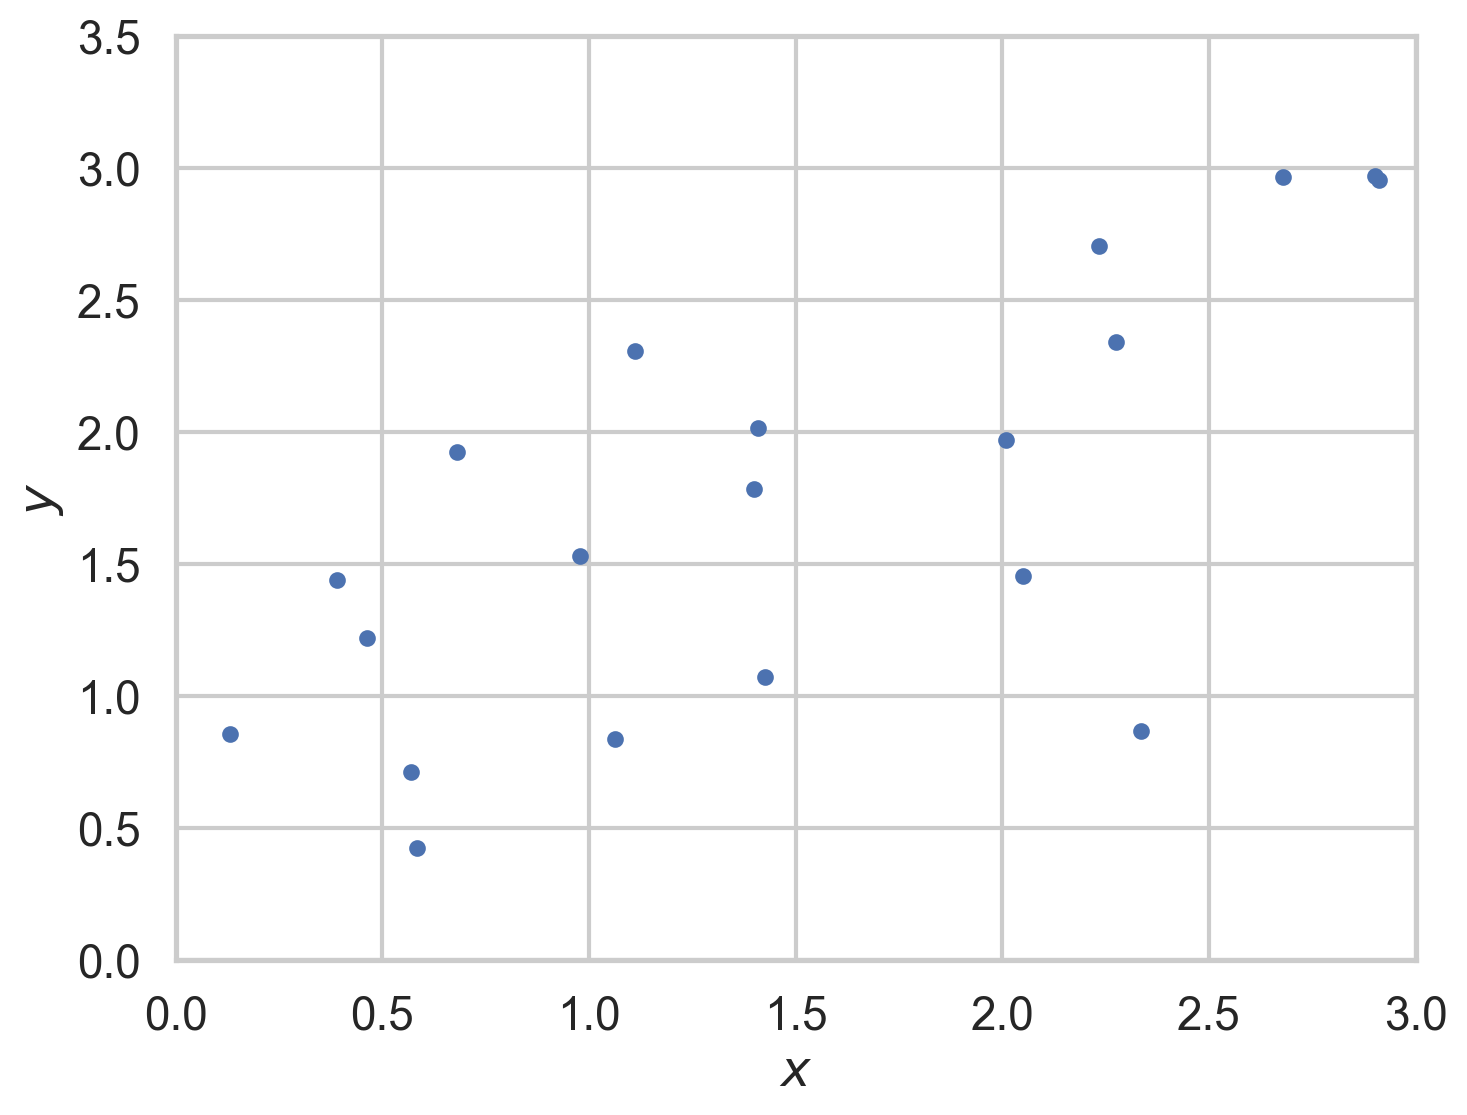

In [4]:
# plot the dataset
fig, ax = plt.subplots()
ax.plot(X, y, "o", markersize=5)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.axis([0.0, 3.0, 0.0, 3.5])
plt.show()

In [ ]:
# fit linear regression model
# TODO
print(
    "Linear Regression Coefficients:",
    lin_reg.coef_,
    "Intercept:",
    lin_reg.intercept_,
)

Linear Regression Coefficients: [[0.64795212]] Intercept: [0.75906315]


In [ ]:
# sanity check
X_b = add_dummy_feature(X)  # add bias term (intercept)
theta_manual = #TODO
print("Manual Coefficients:", theta_manual[1:], "Intercept:", theta_manual[0])

assert np.allclose(lin_reg.intercept_, theta_manual[0])
assert np.allclose(lin_reg.coef_, theta_manual[1:])

Manual Coefficients: [[0.64795212]] Intercept: [0.75906315]


In [ ]:
# fit Ridge regression model
alpha = 3
# TODO
print(
    "Ridge Regression Coefficients:",
    ridge_reg.coef_,
    "Intercept:",
    ridge_reg.intercept_,
)

Ridge Regression Coefficients: [0.53959292] Intercept: [0.91944427]


In [ ]:
# sanity check
# warning: do not regularize the intercept term
mat_I = np.eye(X_b.shape[1])
mat_I[0, 0] = 0  # do not regularize the intercept term

theta_ridge_manual = #TODO
print(
    "Manual Ridge Coefficients:",
    theta_ridge_manual[1:],
    "Intercept:",
    theta_ridge_manual[0],
)
assert np.allclose(ridge_reg.intercept_, theta_ridge_manual[0])
assert np.allclose(ridge_reg.coef_, theta_ridge_manual[1:])

Manual Ridge Coefficients: [[0.53959292]] Intercept: [0.91944427]


In [12]:
# generate new data for predictions
X_new = np.linspace(X.min(), X.max(), 100).reshape(100, 1)

# make predictions
lin_reg_pred = lin_reg.predict(X_new)
ridge_reg_pred = ridge_reg.predict(X_new)

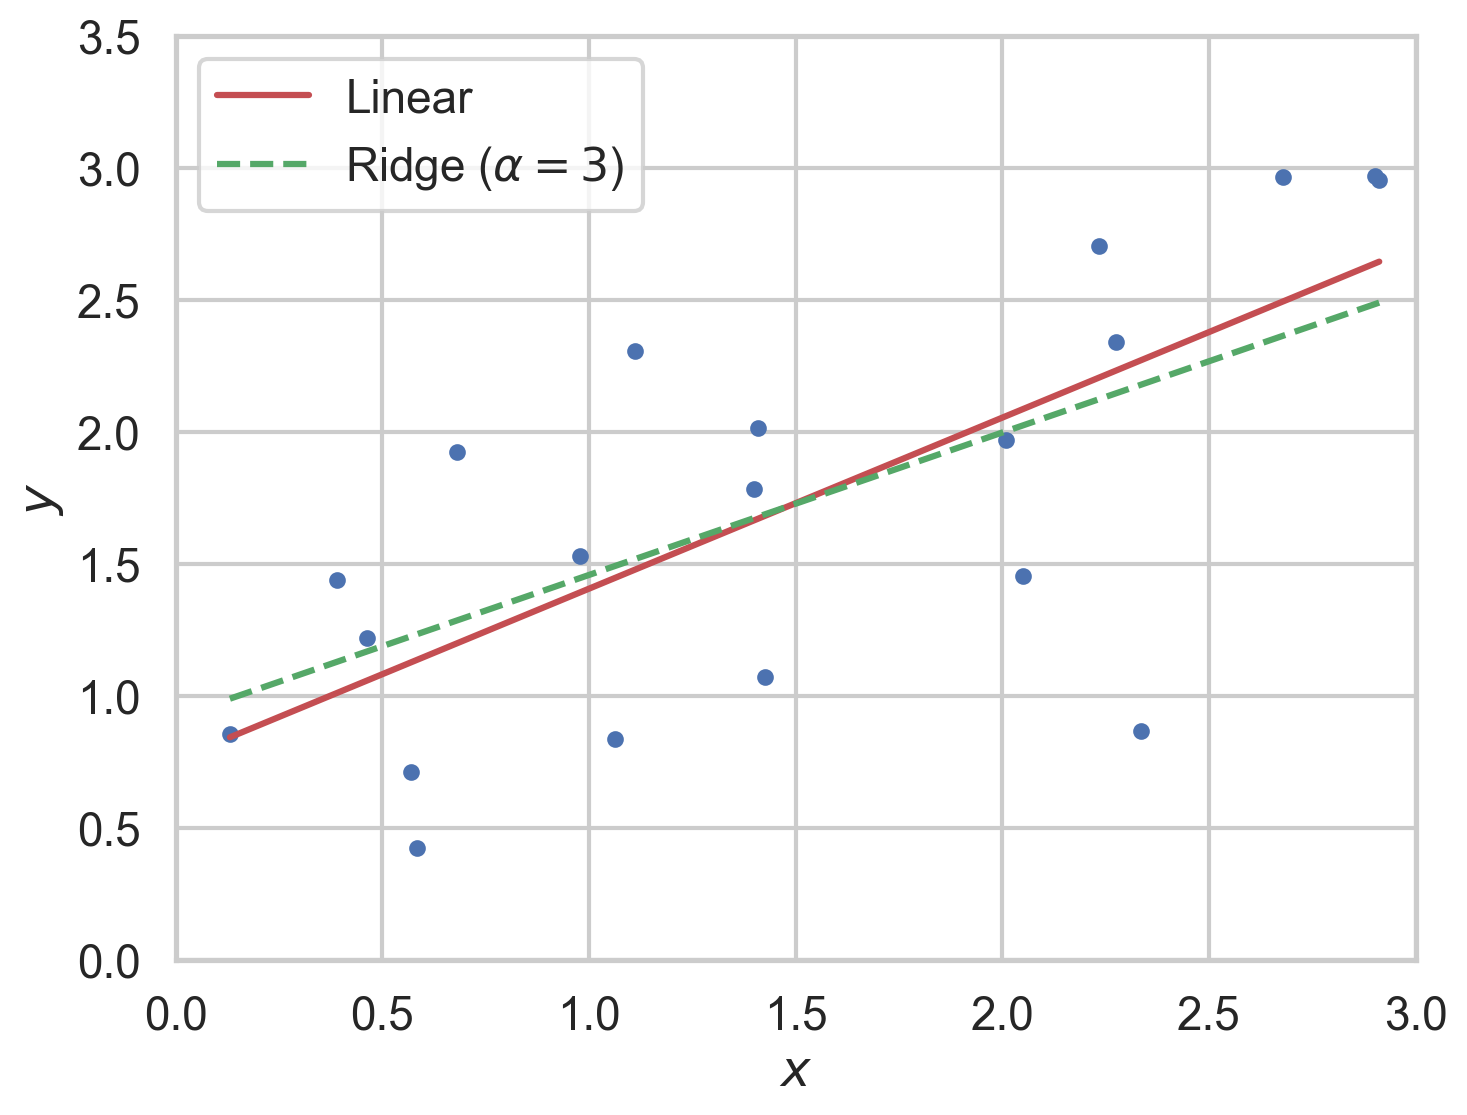

In [13]:
# plot the dataset with regression lines
fig, ax = plt.subplots()
ax.plot(X, y, "o", markersize=5)
ax.plot(X_new, lin_reg_pred, "r-", label="Linear")
ax.plot(X_new, ridge_reg_pred, "g--", label=rf"Ridge ($\alpha={alpha}$)")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.axis([0.0, 3.0, 0.0, 3.5])
plt.show()

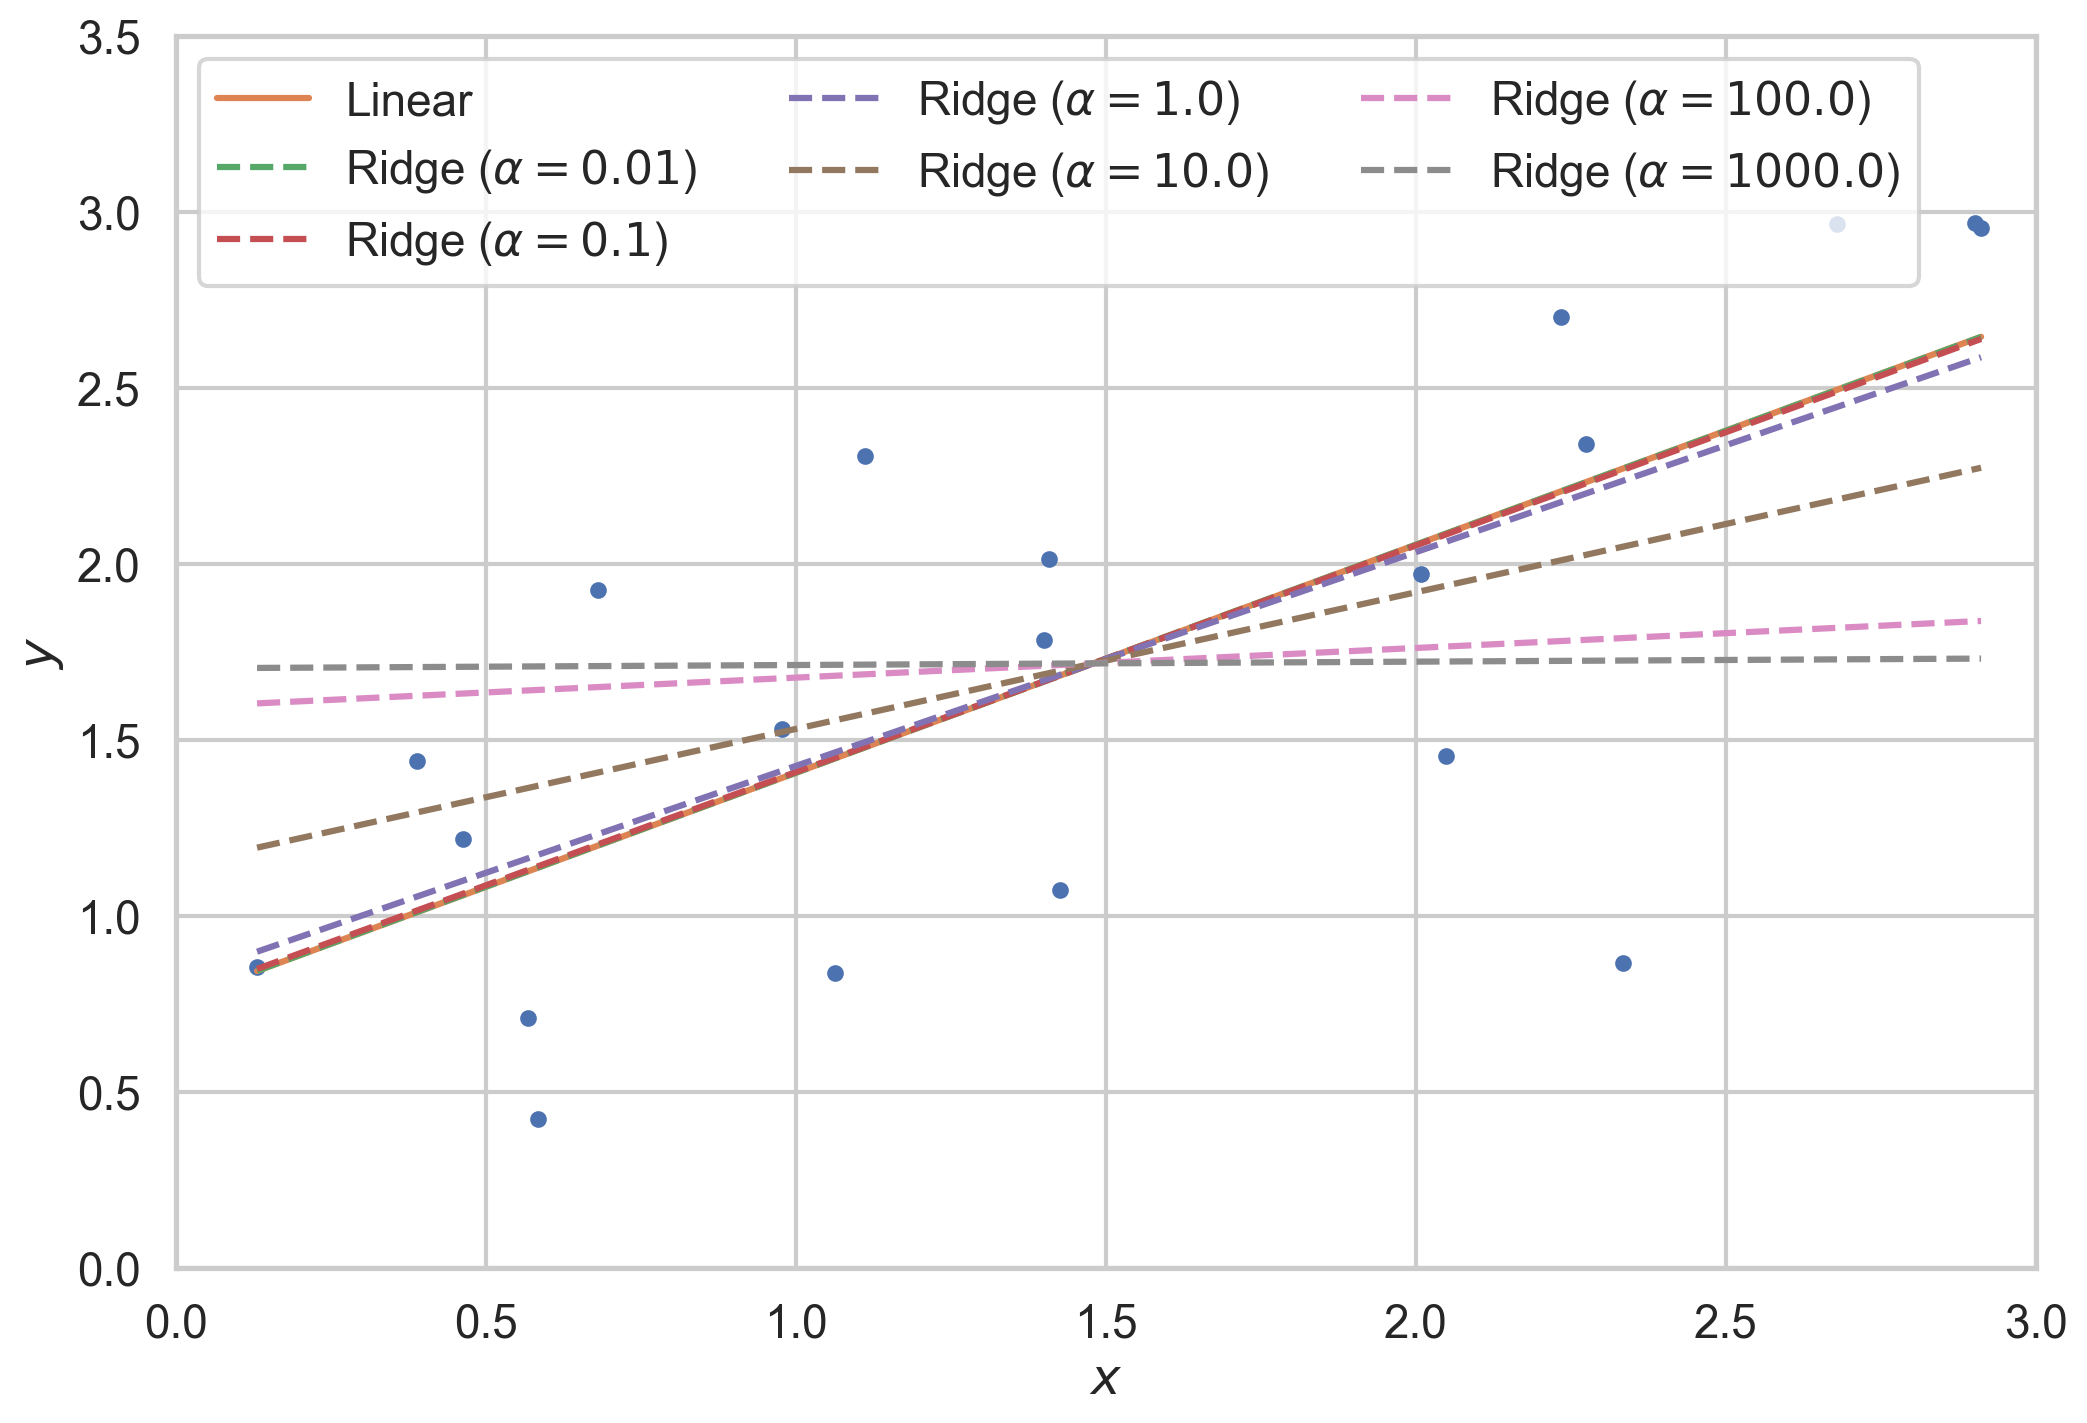

In [14]:
# make ridge predictions with different alpha values
alphas = np.logspace(-2, 3, 6)

# plot the dataset with regression lines for different alpha values
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(X, y, "o", markersize=5)
ax.plot(X_new, lin_reg_pred, "-", label="Linear")
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X, y)
    ridge_reg_pred = ridge_reg.predict(X_new)
    ax.plot(X_new, ridge_reg_pred, "--", label=rf"Ridge ($\alpha={alpha}$)")
ax.legend(ncol=3)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.axis([0.0, 3.0, 0.0, 3.5])
plt.show()

# Lasso regression example

[sklearn - Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# fit Lasso regression model
alpha = 0.1
# TODO
print("Lasso Regression Coefficients:", lasso.coef_, "Intercept:", lasso.intercept_)

Lasso Regression Coefficients: [0.51407441] Intercept: [0.95721391]


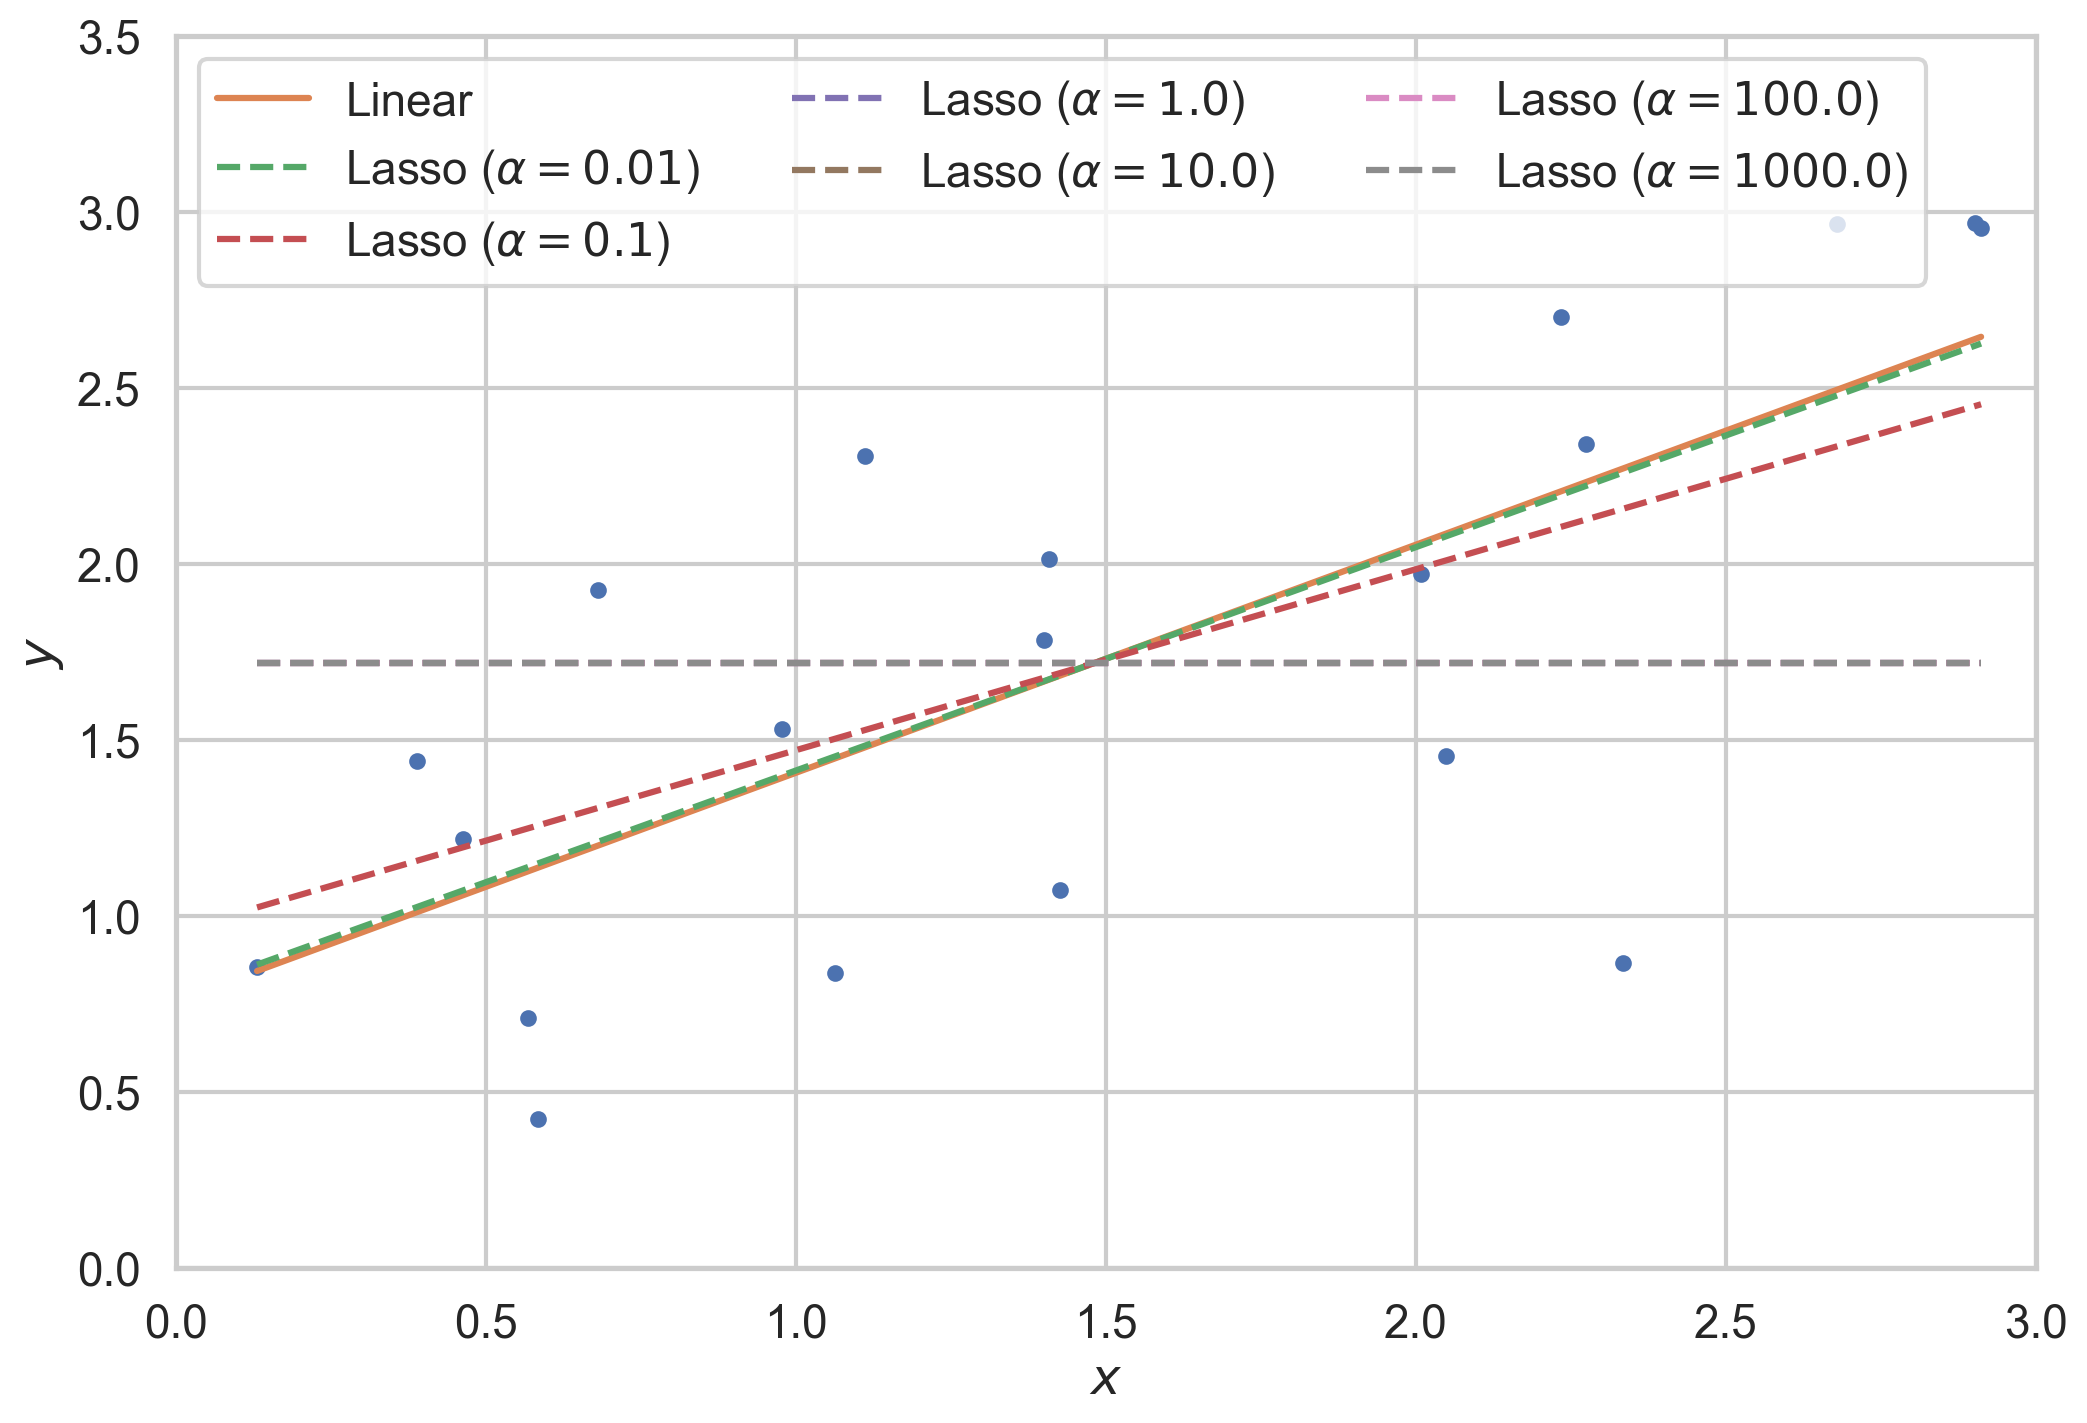

In [17]:
# make ridge predictions with different alpha values
alphas = np.logspace(-2, 3, 6)

# plot the dataset with regression lines for different alpha values
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(X, y, "o", markersize=5)
ax.plot(X_new, lin_reg_pred, "-", label="Linear")
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    lasso_pred = lasso.predict(X_new)
    ax.plot(X_new, lasso_pred, "--", label=rf"Lasso ($\alpha={alpha}$)")
ax.legend(ncol=3)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.axis([0.0, 3.0, 0.0, 3.5])
plt.show()

# Multidimensional regression with Ridge and Lasso

In [ ]:
rng = np.random.default_rng(0)

# multi-dimensional dataset
n, p = 200, 10
X = rng.normal(size=(n, p))

beta_true = rng.normal(size=p)
y = X @ beta_true + 0.5 * rng.normal(size=n) + 2.0

# standardize features (important for regularization)
scaler = #TODO
Xz = #TODO

# fit Ridge and Lasso for increasing alphas and show how coefficients shrink to 0
alphas = np.logspace(-4, 6, 9)
for name in ["Ridge", "Lasso"]:
    print(f"{name} regression coefficients for different alpha values:\n")
    print(20 * "---")
    print("alpha        ||beta||_2     max|beta|     intercept")
    for a in alphas:
        model = (
            Ridge(alpha=a, fit_intercept=True)
            if name == "Ridge"
            else Lasso(alpha=a, fit_intercept=True)
        )
        model.fit(Xz, y)
        beta = model.coef_
        print(
            f"{a:10.1e}  {np.linalg.norm(beta):11.4e}  {np.max(np.abs(beta)):11.4e}  "
            f"{model.intercept_:9.4f}"
        )

    print("\nTrue beta (for reference):")
    print(beta_true)
    print("\n")

Ridge regression coefficients for different alpha values:

------------------------------------------------------------
alpha        ||beta||_2     max|beta|     intercept
   1.0e-04   3.1541e+00   1.6914e+00     2.2751
   1.8e-03   3.1541e+00   1.6914e+00     2.2751
   3.2e-02   3.1536e+00   1.6912e+00     2.2751
   5.6e-01   3.1448e+00   1.6875e+00     2.2751
   1.0e+01   2.9967e+00   1.6242e+00     2.2751
   1.8e+02   1.6557e+00   9.6586e-01     2.2751
   3.2e+03   1.9005e-01   1.1666e-01     2.2751
   5.6e+04   1.1372e-02   7.0121e-03     2.2751
   1.0e+06   6.4181e-04   3.9585e-04     2.2751

True beta (for reference):
[ 0.41925483 -0.50224455 -0.85769996 -1.60030524 -1.68033368 -0.12212012
 -1.57473392 -0.01510599 -0.79798087 -0.42616454]


Lasso regression coefficients for different alpha values:

------------------------------------------------------------
alpha        ||beta||_2     max|beta|     intercept
   1.0e-04   3.1538e+00   1.6913e+00     2.2751
   1.8e-03   3.1489e+00

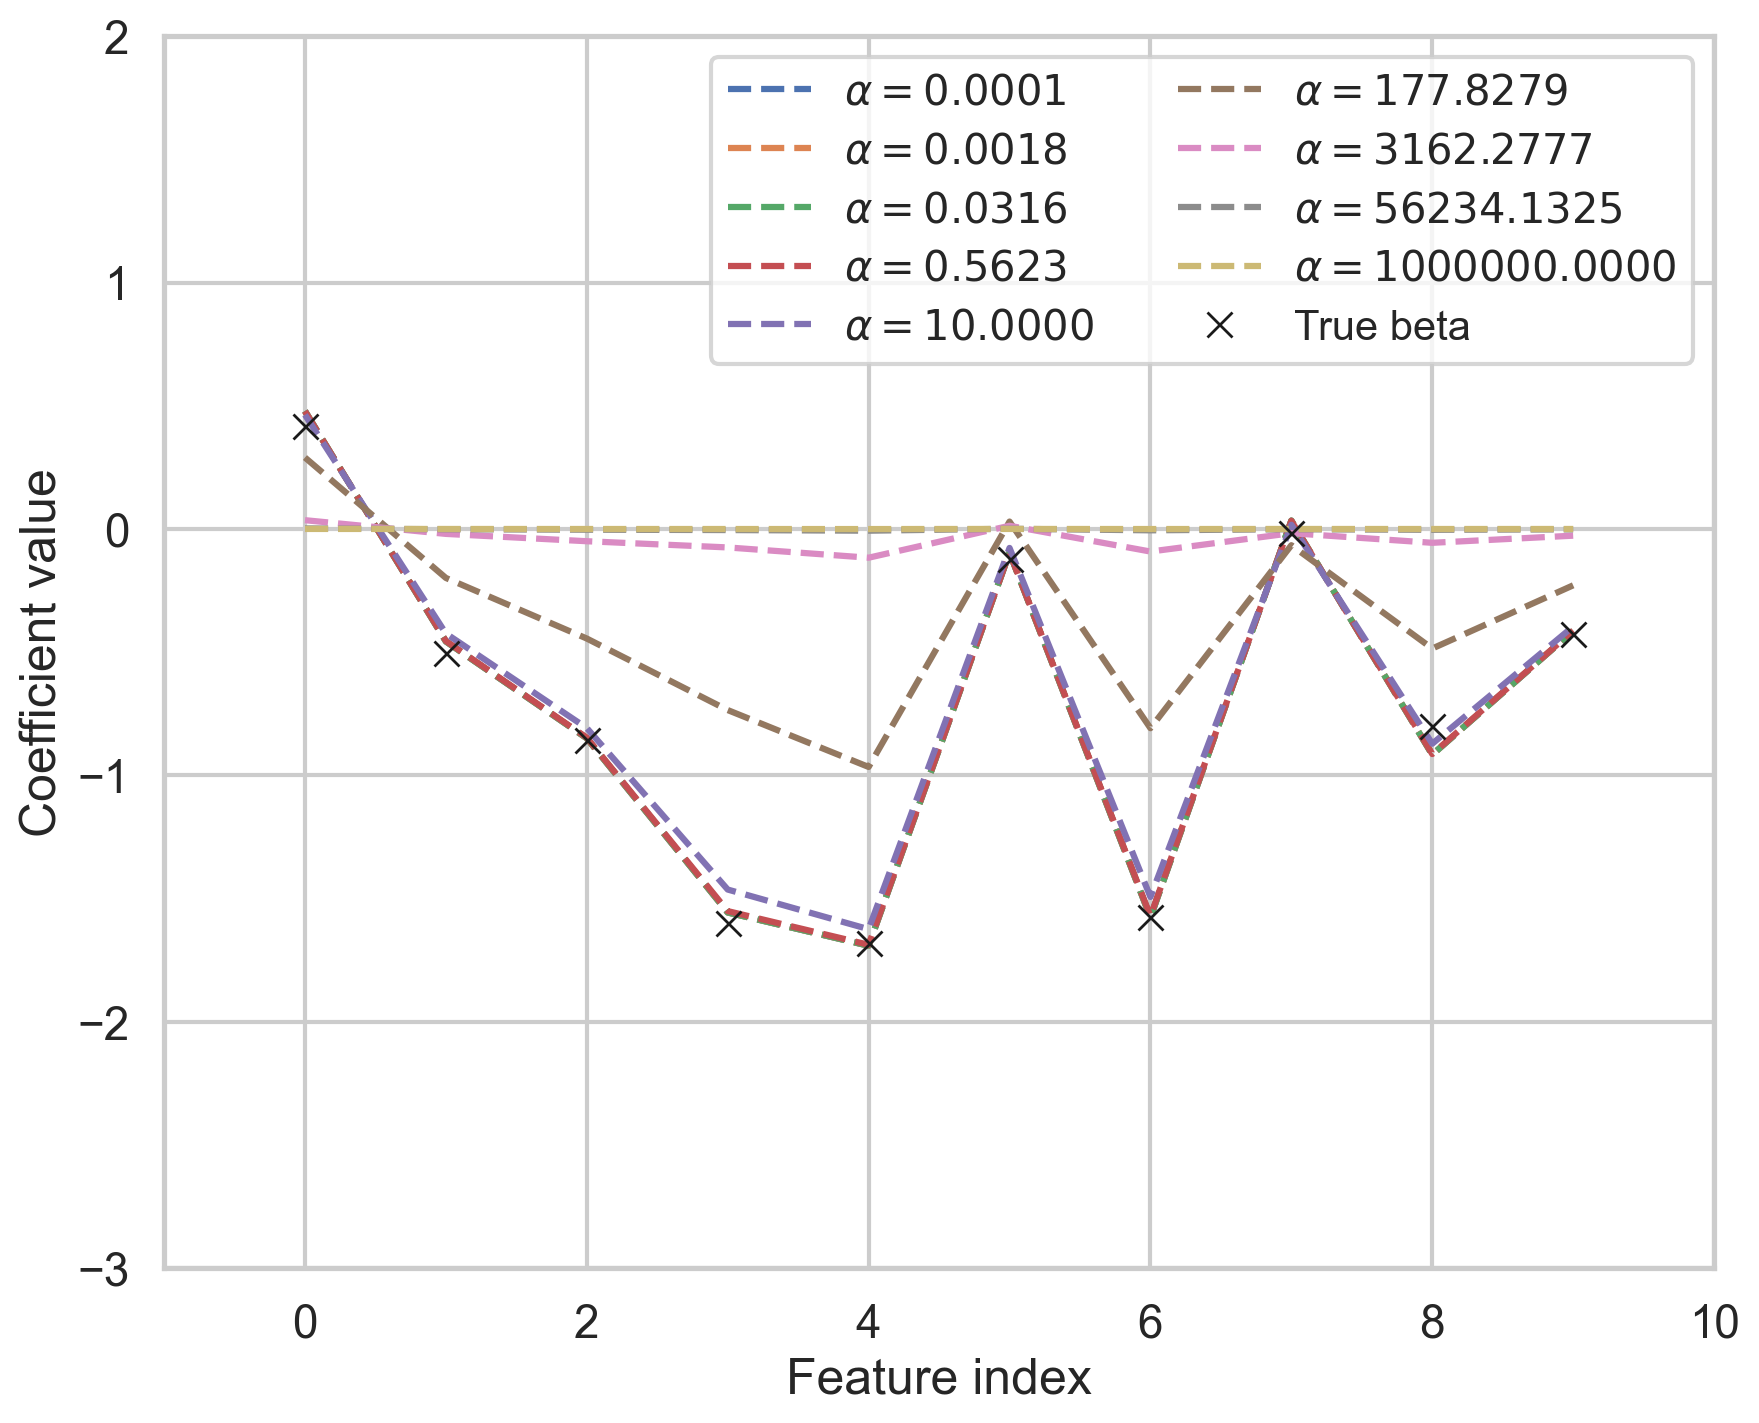

In [ ]:
# Ridge: plot the coefficients for different alpha values
fig, ax = plt.subplots(figsize=(10, 8))
for a in alphas:
    #TODO
    beta = #TODO
    ax.plot(beta, "--", label=rf"$\alpha={a:.4f}$")
ax.plot(beta_true, "kx", label="True beta")
ax.set_xlabel("Feature index")
ax.set_ylabel("Coefficient value")
ax.legend(ncol=2, fontsize="small")
ax.axis([-1, 10, -3, 2])
plt.show()

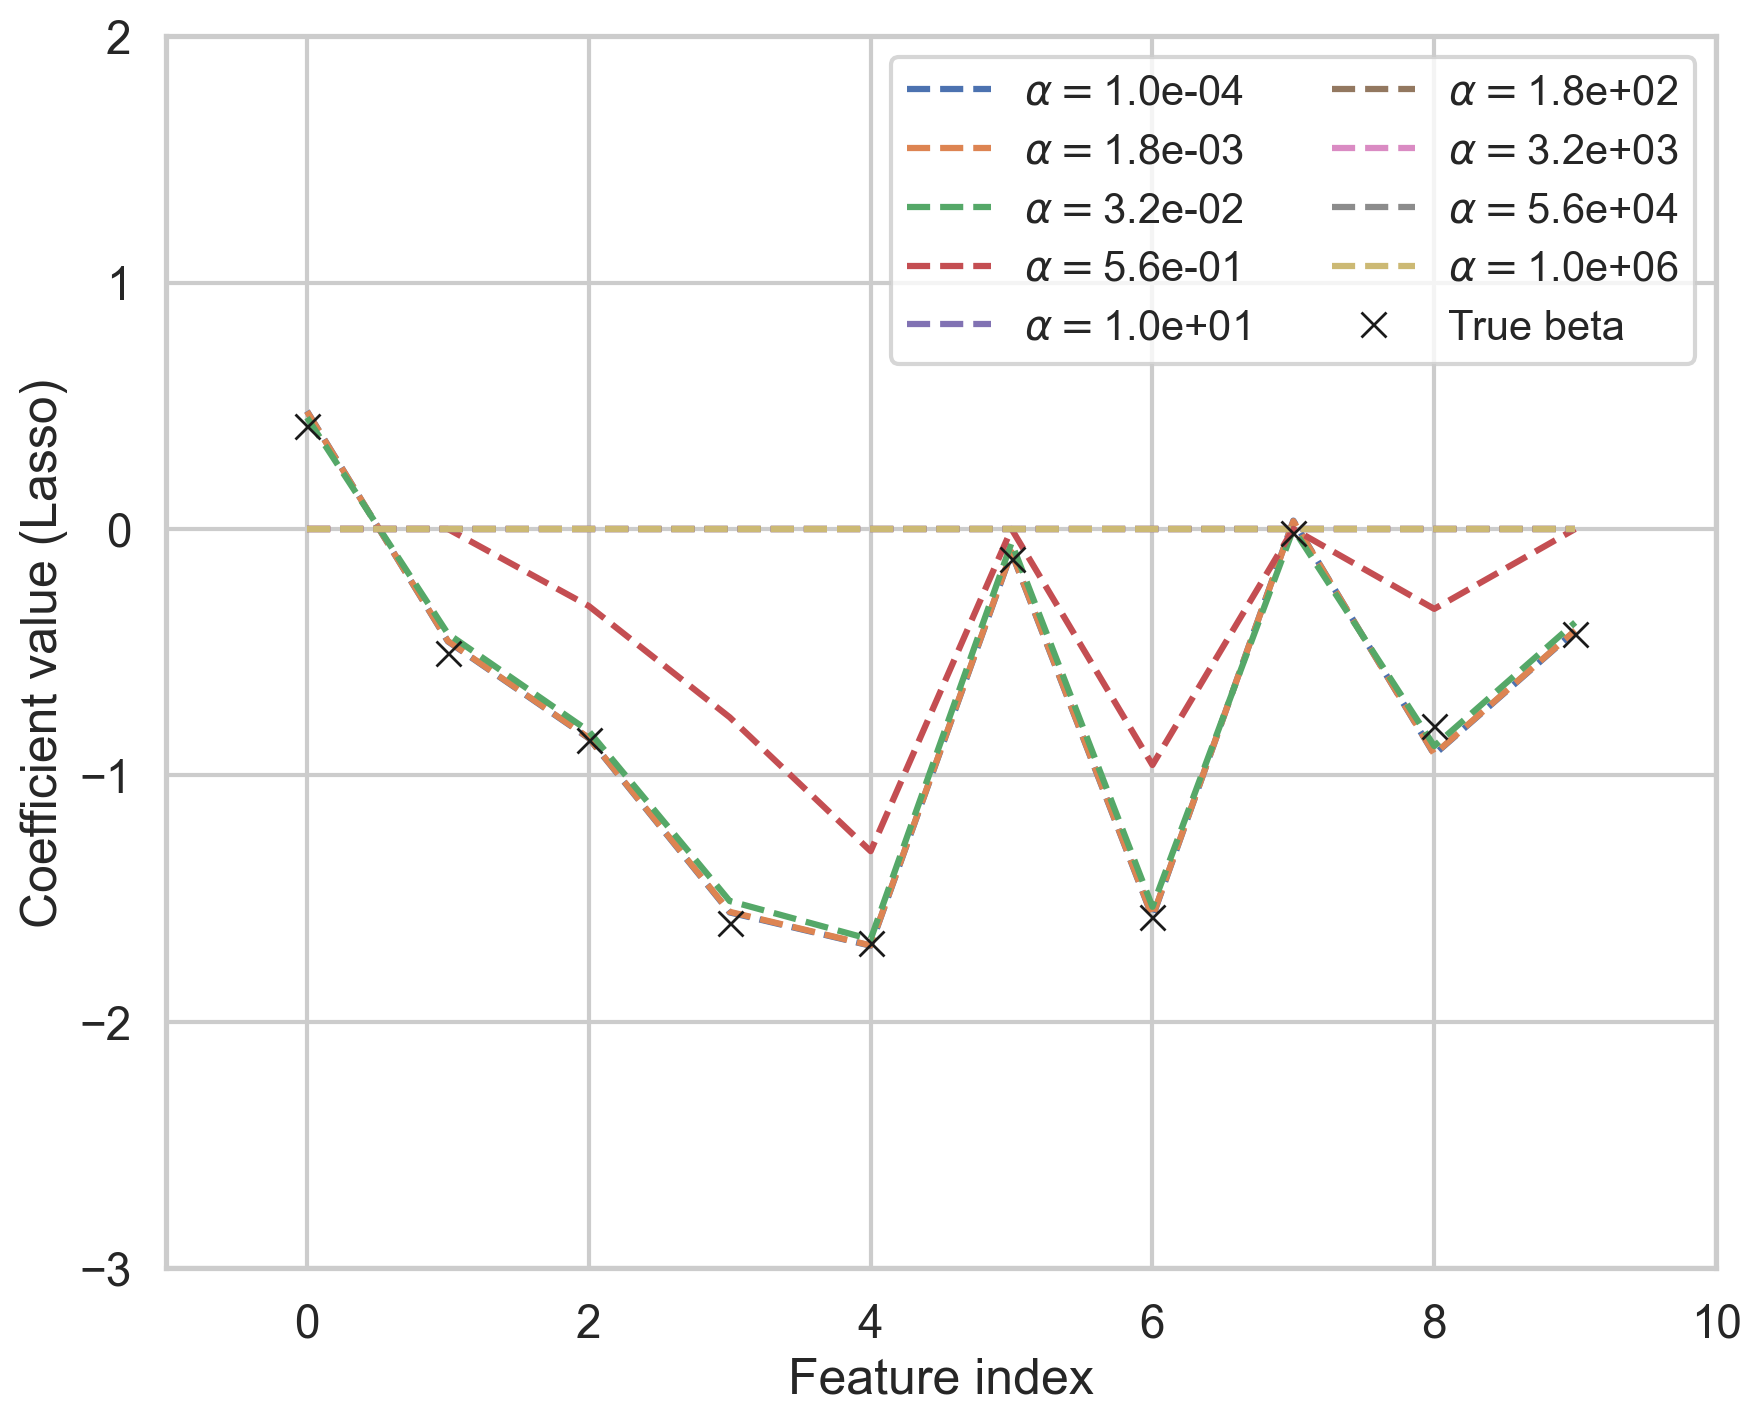

In [ ]:
# same for lasso
fig, ax = plt.subplots(figsize=(10, 8))
for a in alphas:
    #TODO
    beta = #TODO
    ax.plot(beta, "--", label=rf"$\alpha=${a:.1e}")
ax.plot(beta_true, "kx", label="True beta")
ax.set_xlabel("Feature index")
ax.set_ylabel("Coefficient value (Lasso)")
ax.legend(ncol=2, fontsize="small")
ax.axis([-1, 10, -3, 2])
plt.show()

# Standardization

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
# generate random data
rng = np.random.default_rng(1234)
X = 3 * rng.normal(size=(100, 5)) + 1.0

scaler = StandardScaler().fit(X)

# check that the scaler has the correct mean and scale (std) values
assert np.allclose(scaler.mean_, #TODO)
assert np.allclose(scaler.scale_, #TODO)

X_scaled = scaler.transform(X)
assert np.allclose(#TODO, 0)
assert np.allclose(#TODO, 1)
assert np.allclose(X_scaled, (X - scaler.mean_) / scaler.scale_)

# Ridge and Lasso with Train/Test split + Cross-validation

In [ ]:
# generate some sparse data

rng = np.random.default_rng(1234)
n = 300
p = 20
theta_true = np.zeros(p)
size = 10
# only `size` coefficients are non-zero
theta_true[rng.choice(p, size=size, replace=False)] = rng.normal(size=size)
print("True coefficients:", theta_true, "\n")

X = rng.normal(size=(n, p))
y = X @ theta_true + 0.5 * rng.normal(size=n)
print("Shape of X:", X.shape, "\n")
print("Shape of y:", y.shape)

True coefficients: [ 0.          0.          0.         -1.60383681  0.          0.86374389
  0.94547297  0.          0.15261919 -1.47882336  0.06409991  0.
  0.          2.91309922  0.         -1.66613546  0.          0.7408913
  0.          0.34374458] 

Shape of X: (300, 20) 

Shape of y: (300,)


In [ ]:
# train/test split (important for evaluating the performance of regularization)
# do it only once. By default the split is random, but we set a random seed for
# reproducibility. It shuffles the data before splitting, so we don't have to worry
# about the order of the data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (240, 20) (240,)
Test set shape: (60, 20) (60,)


In [ ]:
# standardize features (important for regularization)
scaler = #TODO
X_train_scaled = #TODO
X_test_scaled = #TODO

Why do we use `transform` on `X_train` and on `X_test`?

- `fit(X_train)` computes the mean and standard deviation of `X_train`

- `transform(X_train)` scales the data using those statistics.

$$
X_{train} ← \frac{X_{train} - \mu_{train}}{\sigma_{train}}
$$

- `transform(X_test)` applies the same transformation to `X_test` using the mean and standard deviation computed from `X_train`.
No data leakage occurs because we are not using any information from `X_test` to compute the scaling parameters.

$$
X_{test} ← \frac{X_{test} - \mu_{train}}{\sigma_{train}}
$$

- We transform `X_test` using the mean and standard deviation from `X_train` to ensure that both datasets are on the same scale.

- Ridge and Lasso are scale-sensitive, so we need to standardize the features before applying these regression techniques.

In [53]:
# cross-validation setup for training set only
cv = KFold(n_splits=5, shuffle=True, random_state=12345)
alphas = np.logspace(-4, 1, 20)

cv_split = list(cv.split(X_train_scaled))  # splits
print("KFold splits (train indices, validation indices):\n")
for i, (train_idx, val_idx) in enumerate(cv_split[:1]):
    print(
        f"Fold {i + 1}:\n\n Train indices: {train_idx}\n\n Validation "
        f"indices: {val_idx}"
    )

KFold splits (train indices, validation indices):

Fold 1:

 Train indices: [  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  17  18  19
  21  22  23  24  25  26  28  29  31  32  34  35  36  37  38  39  41  42
  43  44  45  46  48  49  51  53  55  56  58  59  60  61  62  63  64  65
  67  69  70  72  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  90  91  92  96  97  98  99 100 101 102 105 107 108 111 113 114 115
 116 117 118 119 121 123 124 125 126 127 128 129 130 131 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 152 153 154 155 156
 157 160 161 162 164 165 166 167 168 169 171 172 173 174 176 178 179 180
 181 182 183 184 186 187 188 189 191 192 193 194 195 196 197 198 199 200
 201 202 203 205 206 207 208 210 211 212 214 215 217 218 220 221 222 223
 225 226 227 228 229 230 231 234 235 237 238 239]

 Validation indices: [  9  16  20  27  30  33  40  47  50  52  54  57  66  68  71  73  89  93
  94  95 103 104 106 109 110 112 120 122 132 150 

In [54]:
cv_mse_ridge = cv_mse(Ridge, X_train_scaled, y_train, alphas, cv)
cv_mse_lasso = cv_mse(Lasso, X_train_scaled, y_train, alphas, cv)

In [ ]:
best_alpha_ridge = #TODO
best_alpha_lasso = #TODO

print("Best alpha for Ridge:", best_alpha_ridge)
print("Best alpha for Lasso:", best_alpha_lasso)

Best alpha for Ridge: 0.4832930238571752
Best alpha for Lasso: 0.00379269019073225


In [56]:
cv_mse_ridge

[np.float64(0.23405556526909246),
 np.float64(0.2340555167004125),
 np.float64(0.23405542769744545),
 np.float64(0.23405526463227527),
 np.float64(0.23405496599079806),
 np.float64(0.23405441943954974),
 np.float64(0.2340534204868458),
 np.float64(0.2340515990515685),
 np.float64(0.23404829273195102),
 np.float64(0.23404234092641527),
 np.float64(0.23403179612885178),
 np.float64(0.23401369210745382),
 np.float64(0.23398461477629945),
 np.float64(0.2339450739727869),
 np.float64(0.23391856530747335),
 np.float64(0.23402287580363262),
 np.float64(0.23471842453670852),
 np.float64(0.2376319048493103),
 np.float64(0.24815119378711642),
 np.float64(0.2830115695993879)]

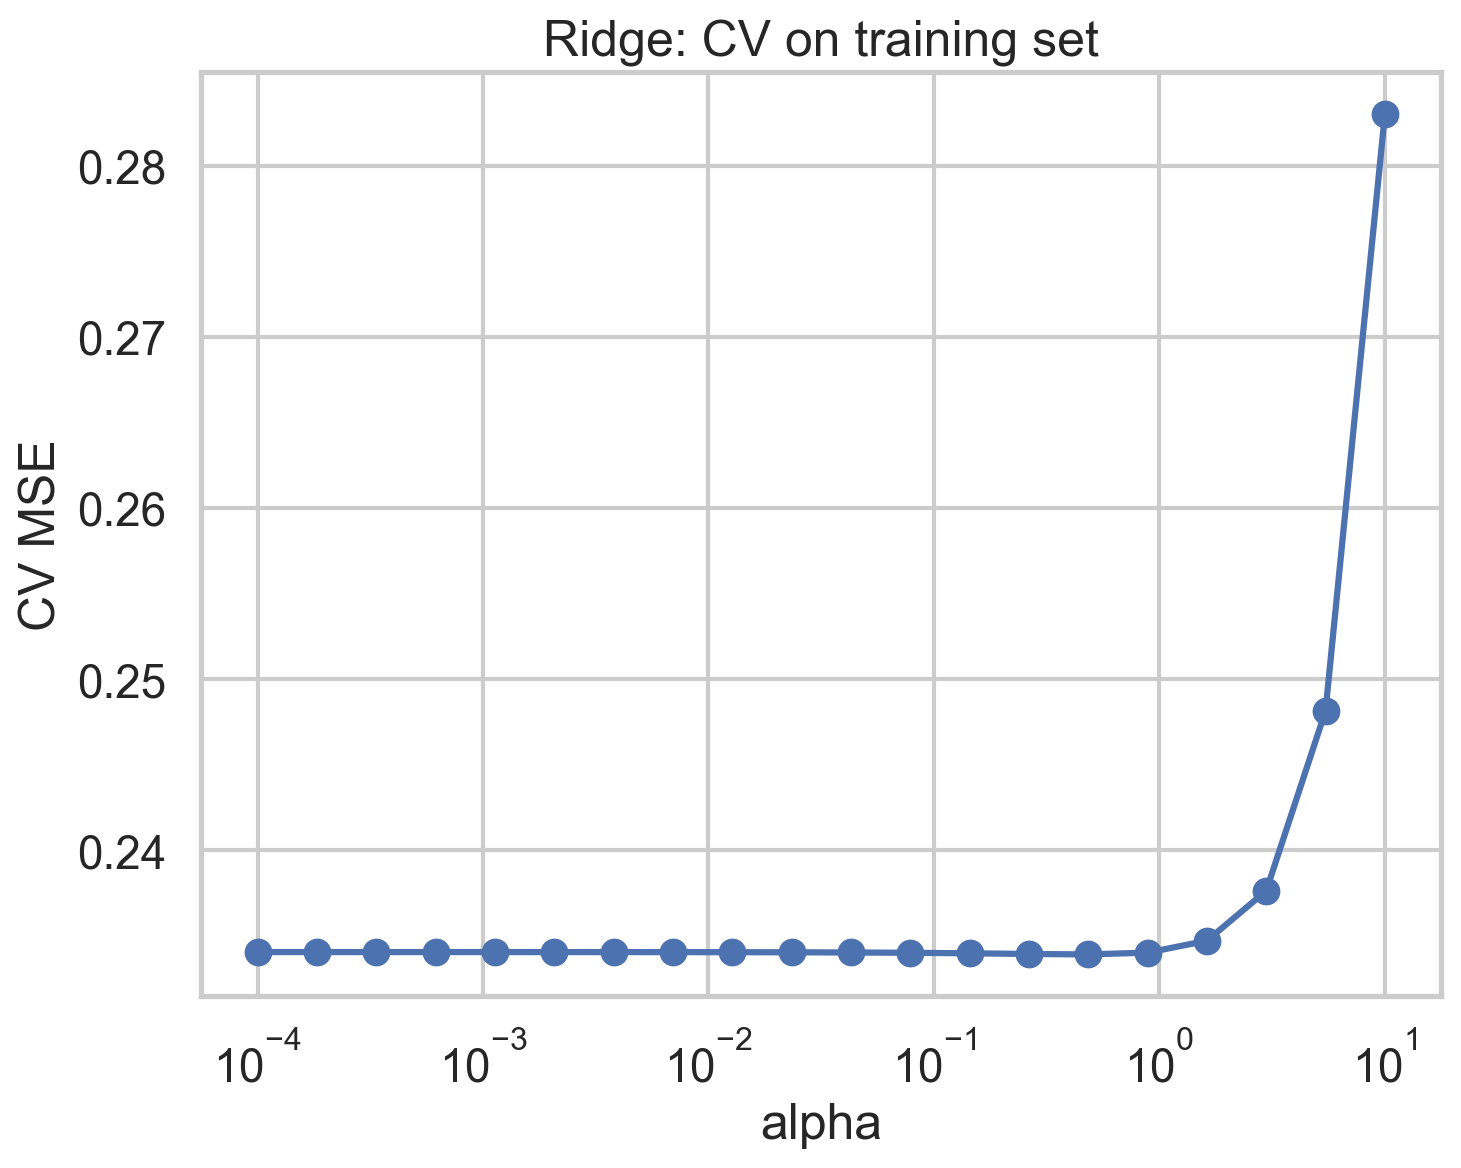

In [57]:
plt.figure()
plt.plot(alphas, cv_mse_ridge, marker="o")
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV MSE")
plt.title("Ridge: CV on training set")
plt.show()

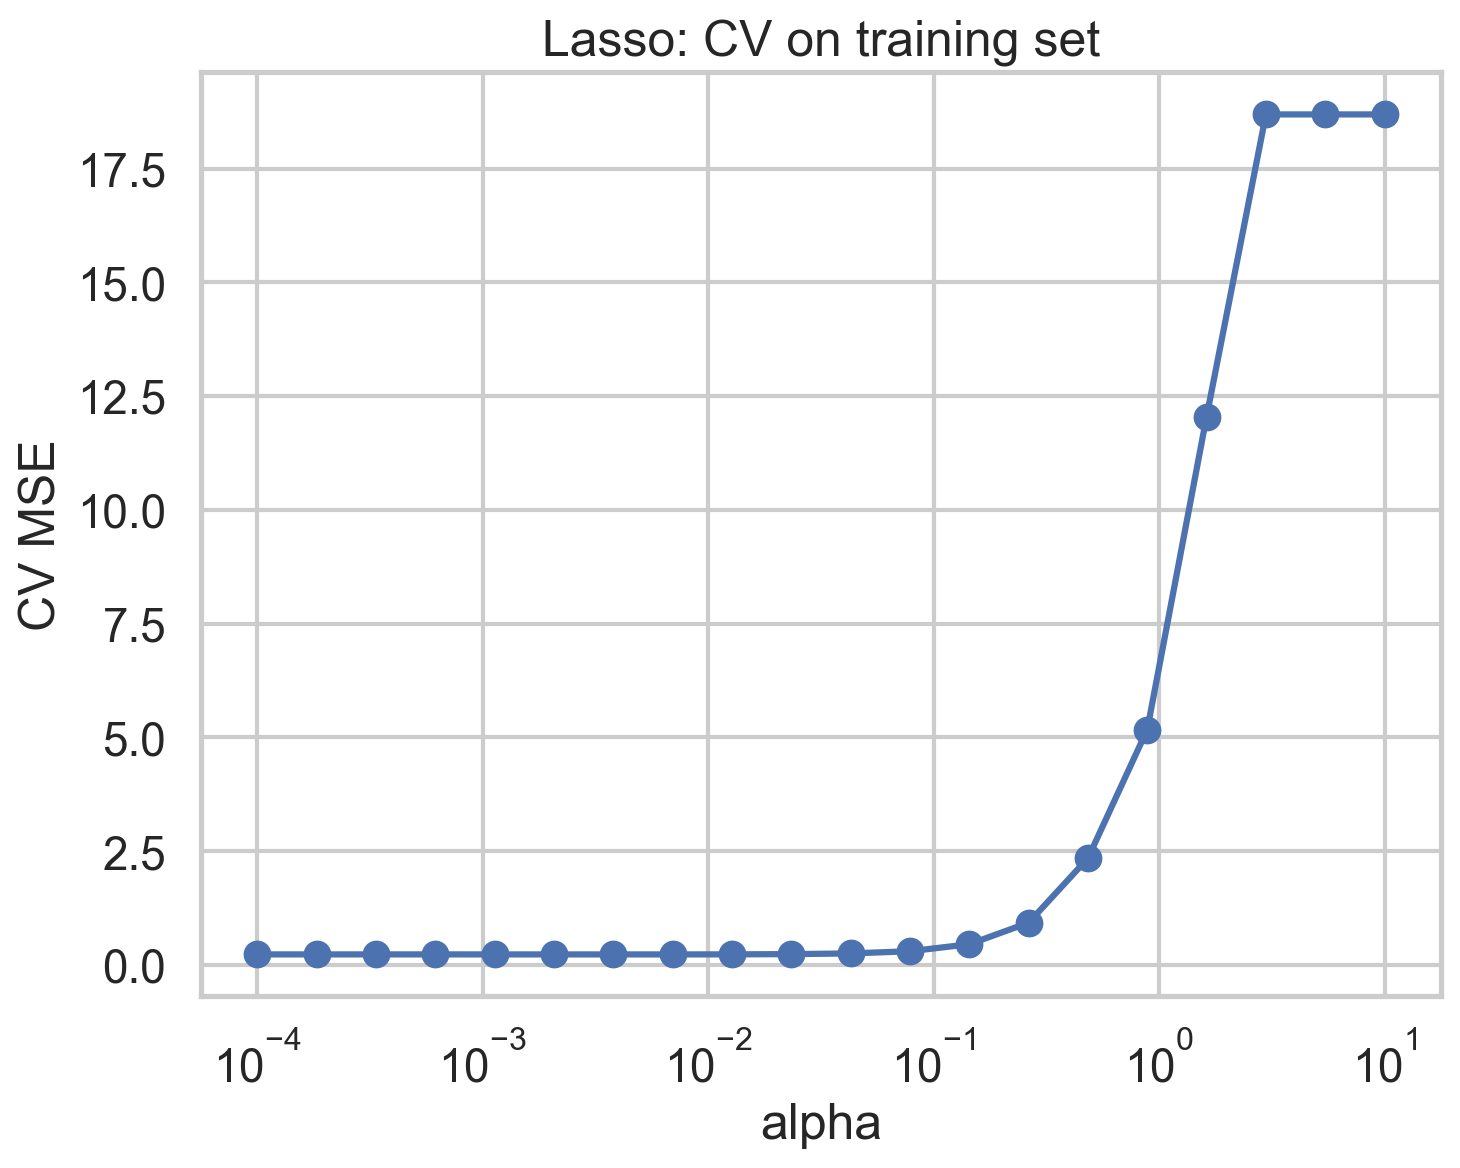

In [58]:
plt.figure()
plt.plot(alphas, cv_mse_lasso, marker="o")
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV MSE")
plt.title("Lasso: CV on training set")
plt.show()

In [ ]:
# create ols, ridge and lasso models with the best alpha values
#TODO
#TODO
#TODO

# fit final models on full training set
#TODO
#TODO
#TODO

# final test-set evaluation
ols_test_mse = #TODO
ridge_test_mse = #TODO
lasso_test_mse = #TODO

print("Test MSE - OLS:", ols_test_mse)
print("Test MSE - Ridge:", ridge_test_mse)
print("Test MSE - Lasso:", lasso_test_mse)

Test MSE - OLS: 0.32699860678493137
Test MSE - Ridge: 0.3255209159374311
Test MSE - Lasso: 0.32156951977913745


# With Pipeline

We can use sklearn's [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to chain together the standardization and regression steps.

In [60]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("regressor", RidgeCV(alphas=alphas, cv=cv)),
    ]
)

pipeline.fit(X_train, y_train)
print("Best alpha from RidgeCV:", pipeline.named_steps["regressor"].alpha_)
print("Test MSE with RidgeCV:", mean_squared_error(y_test, pipeline.predict(X_test)))

Best alpha from RidgeCV: 0.4832930238571752
Test MSE with RidgeCV: 0.3255209159374311


In [61]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("regressor", LassoCV(alphas=alphas, cv=cv)),
    ]
)

pipeline.fit(X_train, y_train)
print("Best alpha from LassoCV:", pipeline.named_steps["regressor"].alpha_)
print("Test MSE with LassoCV:", mean_squared_error(y_test, pipeline.predict(X_test)))

Best alpha from LassoCV: 0.00379269019073225
Test MSE with LassoCV: 0.32156951977913745


# Polynomial Regression

- What to do if the data is more complex than a straight line? 

- Surprisingly, we can still use a linear model to fit nonlinear data. 

- A linear model is linear in the parameters, not necessarily in the features!

- A simple way is to add powers of each feature as new features, then train a linear model on this extended set of features. 

This technique is called **Polynomial Regression**.

Let us generate some noisy data and see how a polynomial regression can fit it.

Base model is: 

$$
    y = 0.5 x^2 + x + 2
$$

In [50]:
rng = np.random.default_rng(seed=42)
m = 200  # number of instances
X = 6 * rng.random((m, 1)) - 3
a = np.array([2, 1, 0.5])
y = a[0] + a[1] * X + a[2] * X**2 + +rng.standard_normal((m, 1))

In [51]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (200, 1)
Shape of y: (200, 1)


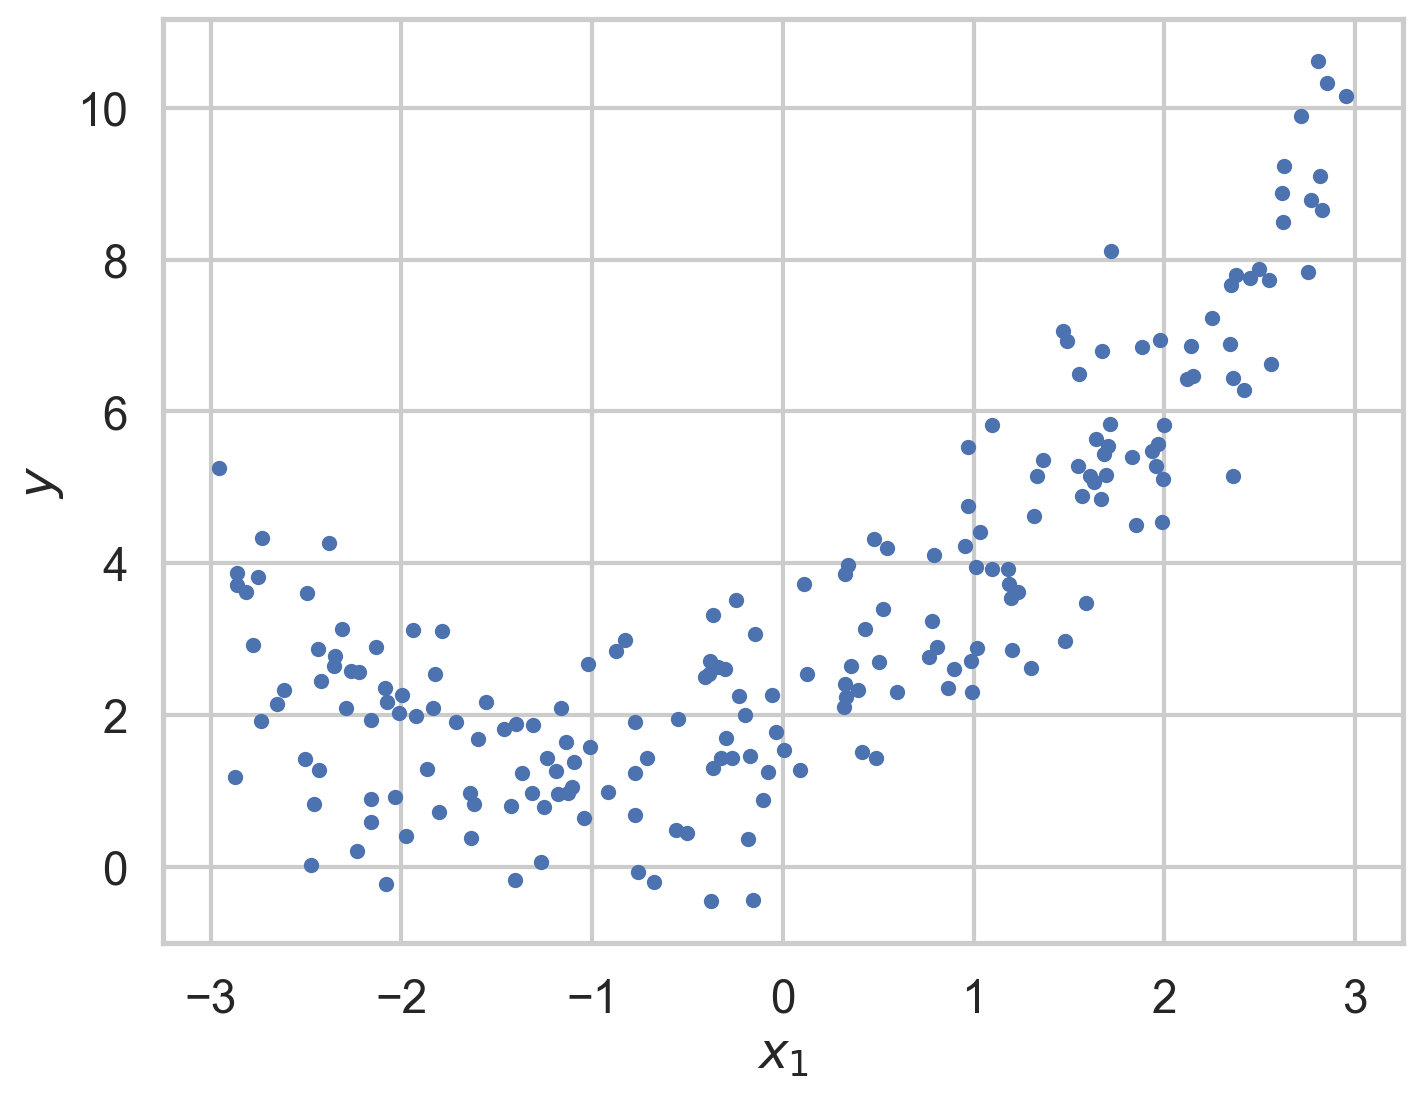

In [52]:
# plot
fig, ax = plt.subplots()
ax.plot(X, y, "b.")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$y$")
# ax.axis([-3, 3, 0, 10])
plt.show()

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [54]:
X_poly.shape

(200, 2)

In [55]:
# generate X, X^2 and check that the transformation is correct
print(X[0], X[0] ** 2)
print(X_poly[0])

[1.64373629] [2.701869]
[1.64373629 2.701869  ]


- We can increase the degree of the polynomial to fit more complex data.

- When there are multiple features, `Polynomial Regression` can find relationships 
between features (impossible for a plain Linear Regression model).

- `PolynomialFeatures` can add all combinations of features up to the given degree.
    - For example, with two features `x1` and `x2` and degree 2, it will add `x1^2`, `x2^2`, and `x1*x2` as new features.

In [83]:
d = 2
p = 2
X_new = np.random.randn(100, p)
poly_d = PolynomialFeatures(degree=d, interaction_only=True, include_bias=False)
X_poly_d = poly_d.fit_transform(X_new)
X_poly_d.shape

(100, 3)

In [56]:
# fit sklearn linear regression on the polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00540719]), array([[1.11022126, 0.50526985]]))

In [60]:
# predictions vs true values
print(a[0], lin_reg.intercept_)
print(a[1:], lin_reg.coef_)

2.0 [2.00540719]
[1.  0.5] [[1.11022126 0.50526985]]


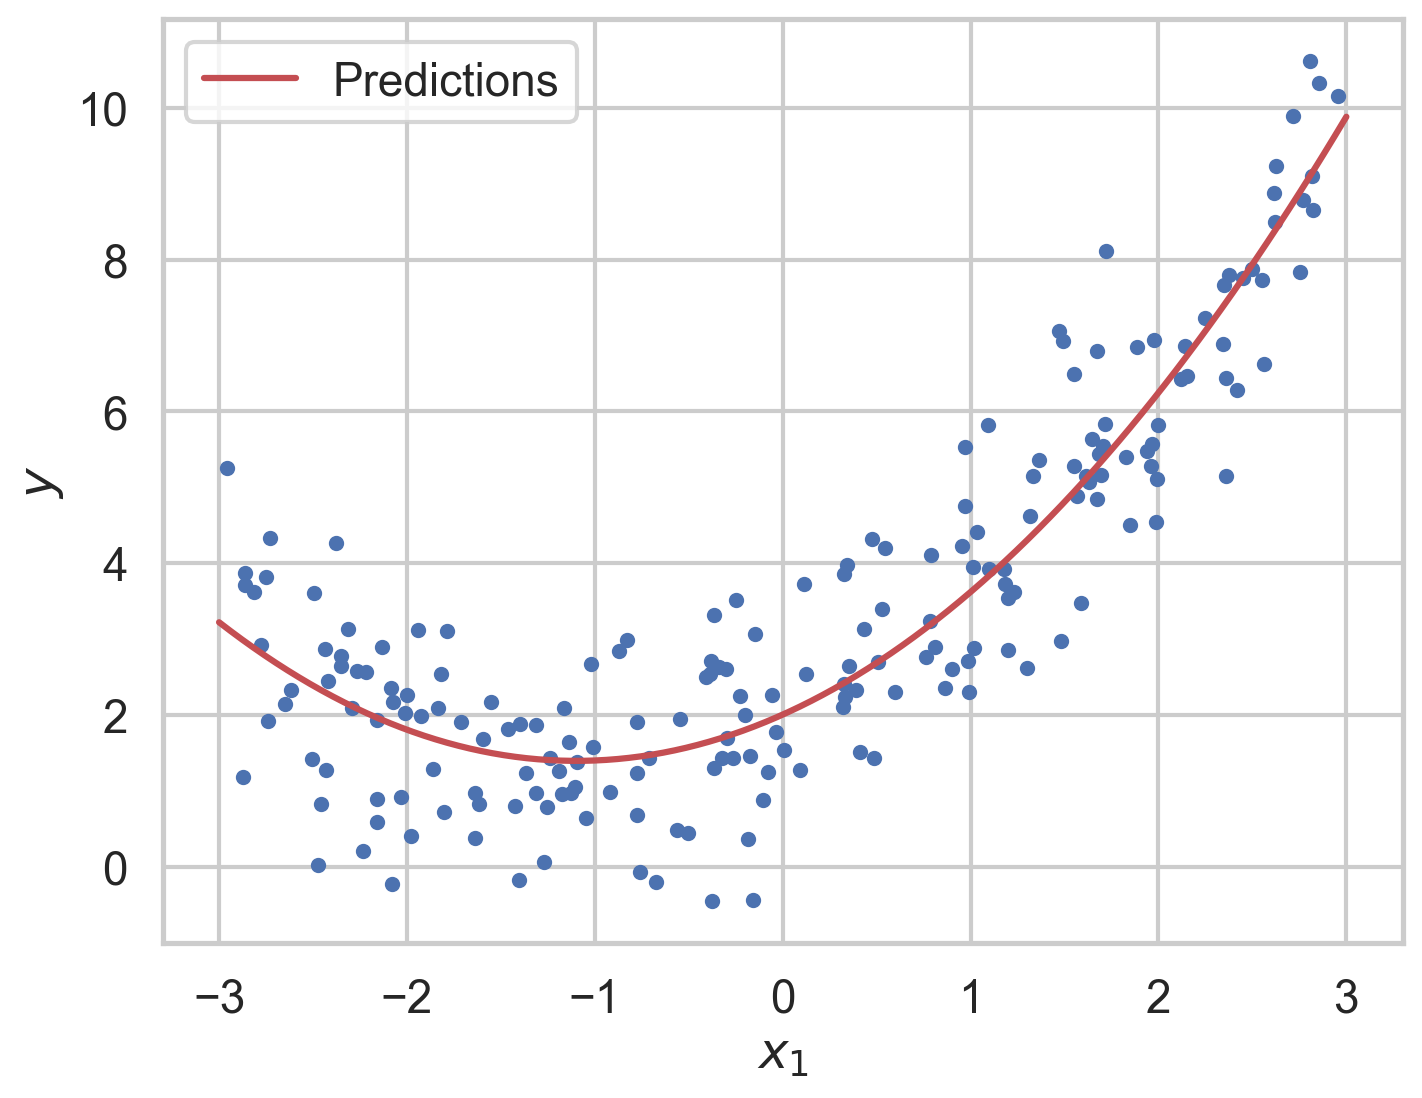

In [22]:
# make predictions on new data
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

fig, ax = plt.subplots()
ax.plot(X, y, "b.")
ax.plot(X_new, y_new, "r-", label="Predictions")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$y$")
ax.legend()
plt.show()

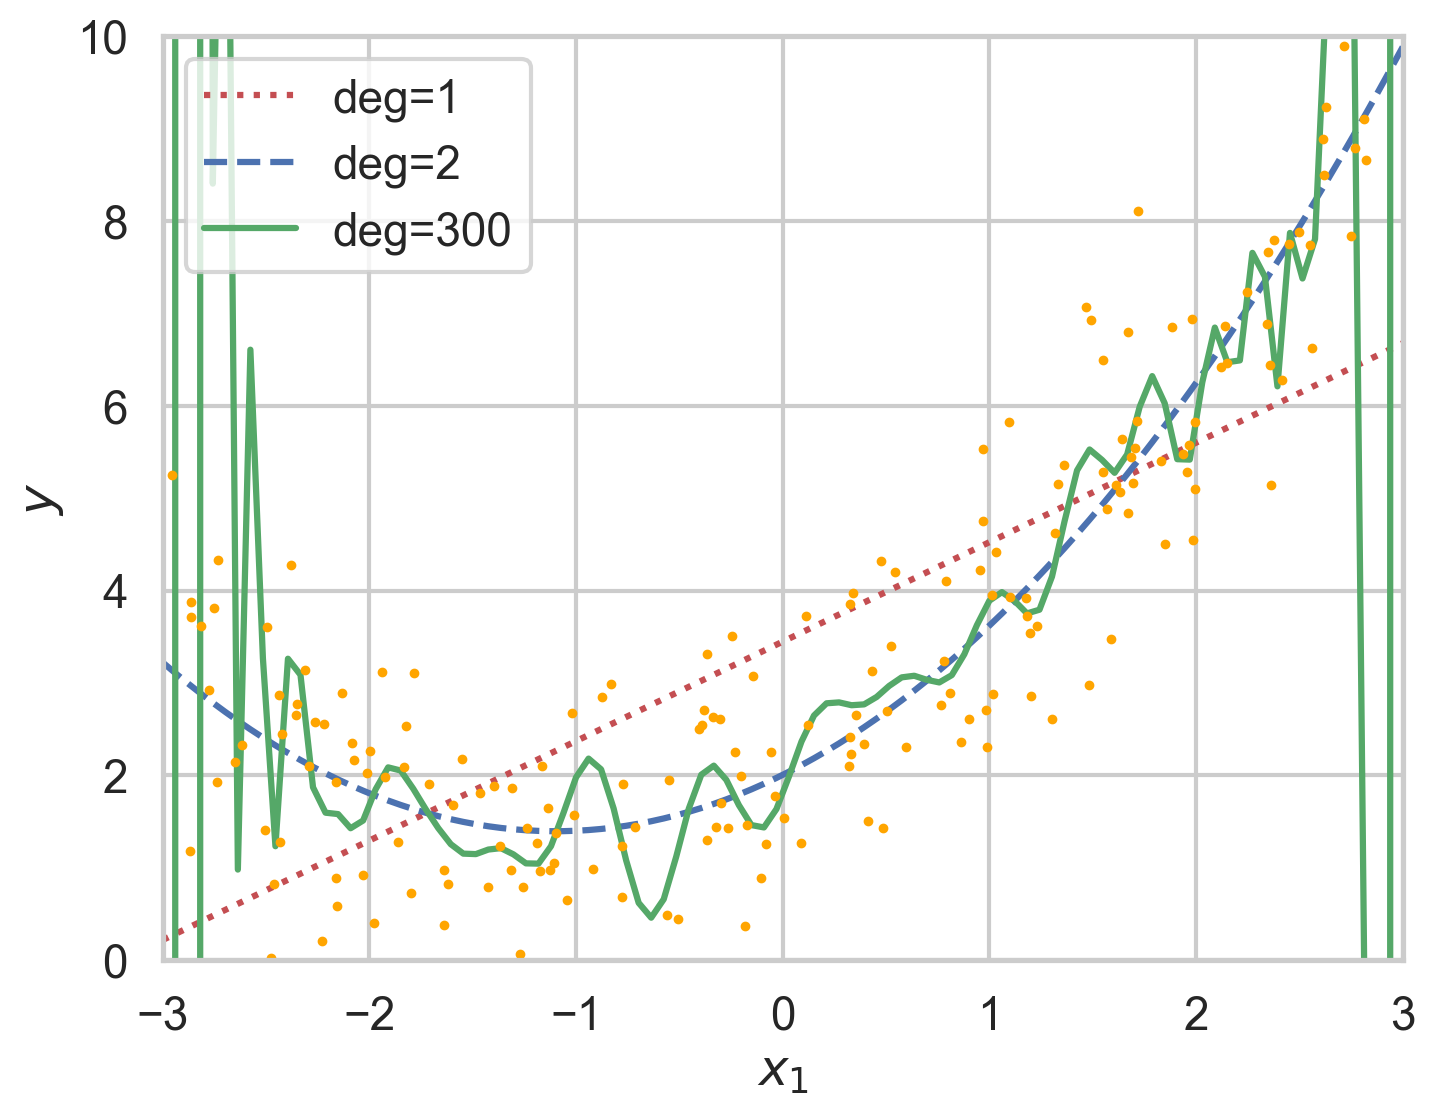

In [33]:
from sklearn.pipeline import make_pipeline

fig, ax = plt.subplots()
for style, degree in (("r:", 1), ("b--", 2), ("g-", 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"deg={degree}"
    ax.plot(X_new, y_newbig, style, label=label)

ax.plot(X, y, ".", markersize=5, color="orange")
ax.legend(loc="upper left")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$y$")
plt.axis([-3, 3, 0, 10])

plt.show()

# Learning curves

[sklearn - learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

- diagnostic tool that shows how a model’s performance evolves as the training set size increases

- helps understand bias vs variance, not to tune hyperparameters directly

- computes scores for different training set sizes:
    - training score (error on the data used to fit the model)
    - validation score (error on held-out data via cross-validation)

- do this for increasing fractions of the dataset (e.g., 10%, 20%, …, 100%)

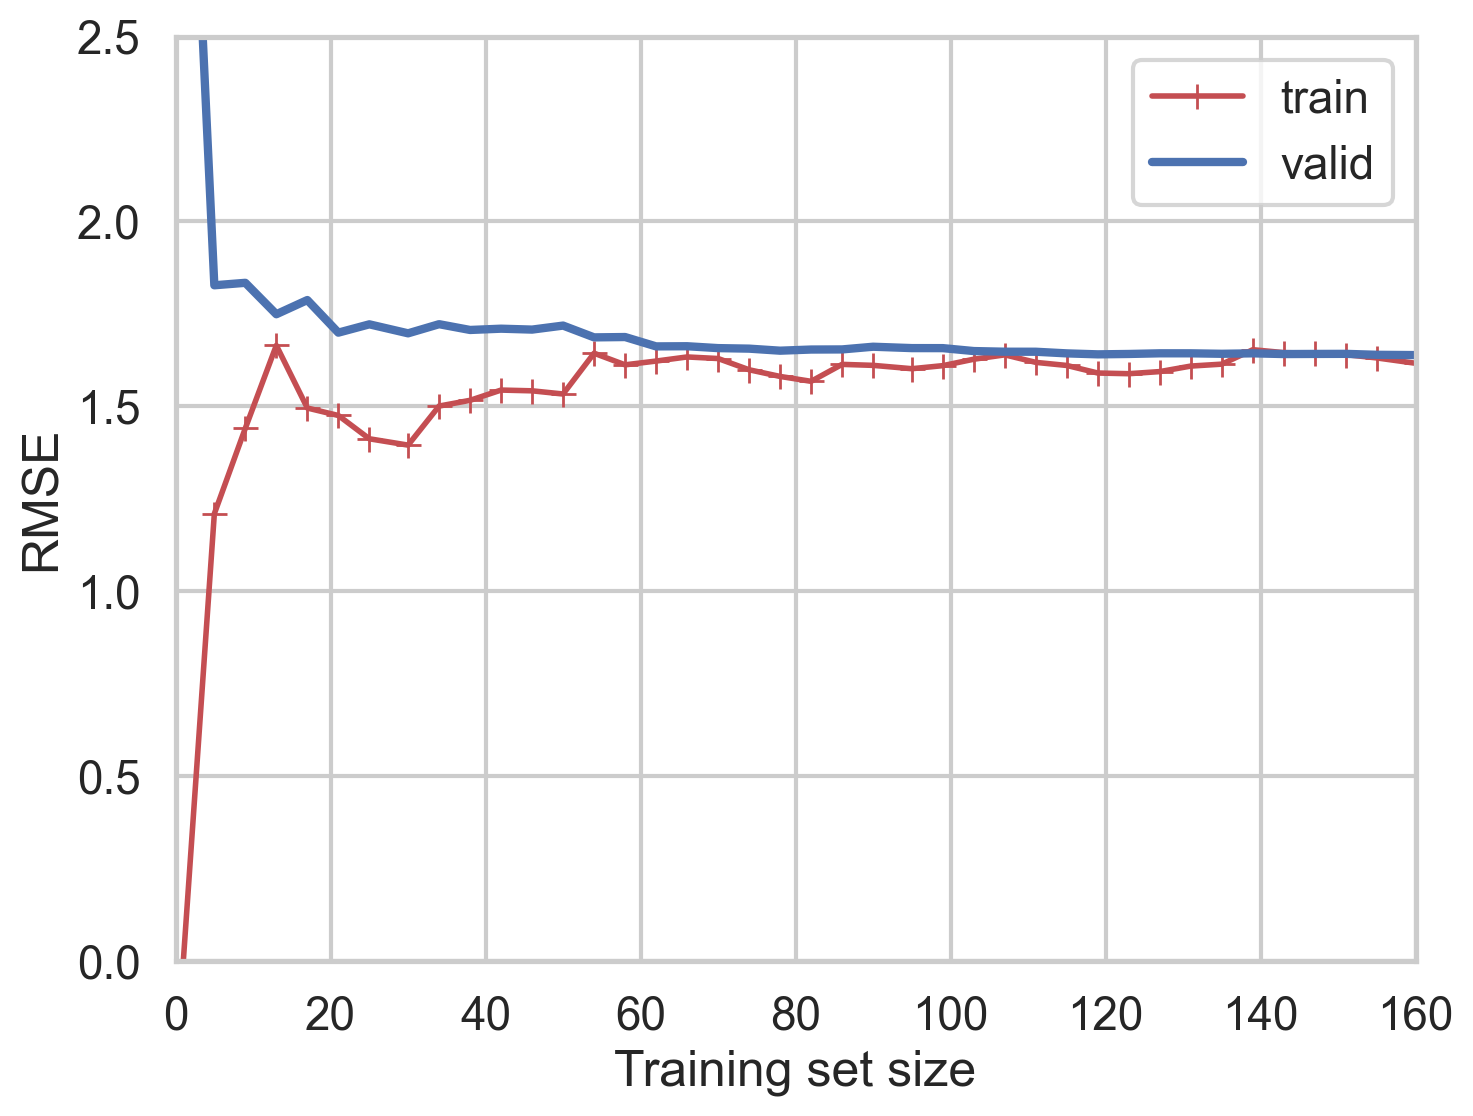

In [35]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),
    X,
    y,
    train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5,
    scoring="neg_root_mean_squared_error",
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
ax.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
ax.set_xlabel("Training set size")
ax.set_ylabel("RMSE")
ax.axis([0, 160, 0, 2.5])
ax.legend()
plt.show()

- At the start (one or two samples), the model can perfectly fit the data (zero training error) but performs poorly on validation data (high validation error)

- As we increase the training set size, the training error typically increases (model can’t perfectly fit all data) while the validation error decreases (model generalizes better).

- Here, they both reach a plateau, indicating that adding more data does not improve performance. This suggests that the model has high bias (underfitting) and is not complex enough to capture the underlying patterns in the data. 

- Observe that they are very close to each other.

All of this suggests that the model is <font color="red">underfitting</font>.

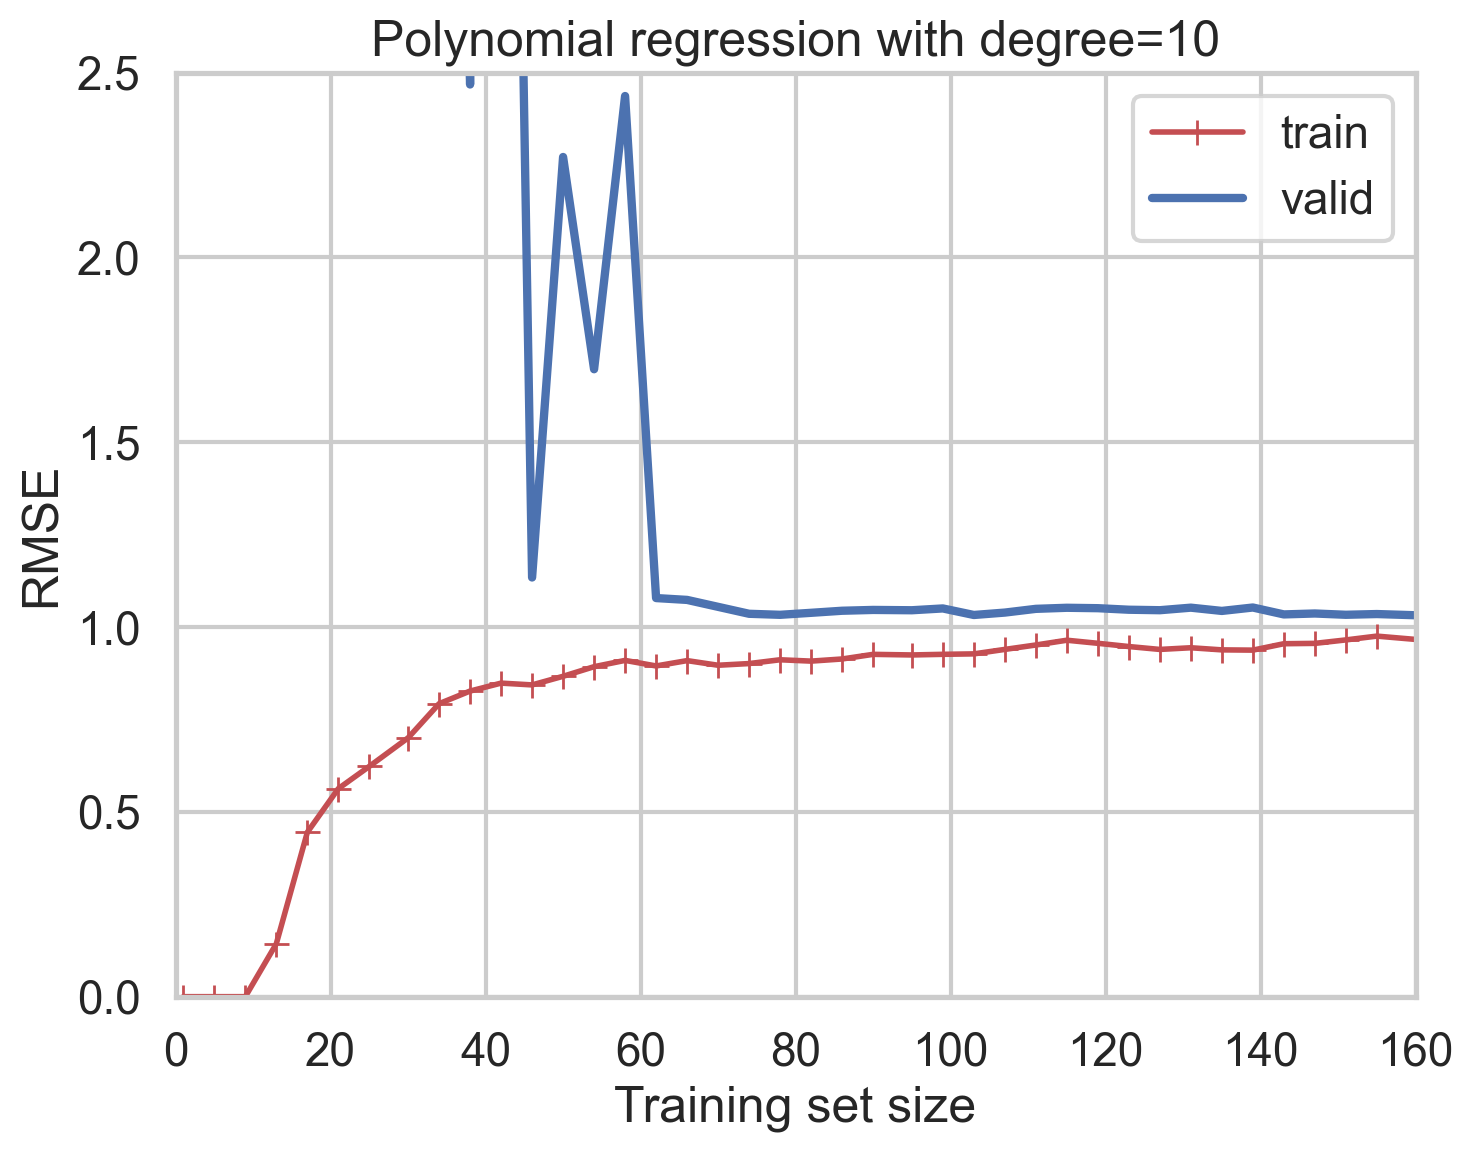

In [49]:
# with polynomial features and a high degree, we expect to see
# overfitting (low training error, high validation error)

degree = 10
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False), LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression,
    X,
    y,
    train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5,
    scoring="neg_root_mean_squared_error",
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
ax.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
ax.set_xlabel("Training set size")
ax.set_ylabel("RMSE")
ax.axis([0, 160, 0, 2.5])
ax.legend()
ax.set_title(f"Polynomial regression with degree={degree}")
plt.show()

- Here, the error on the training data is smaller.

- There is a gap between the training and validation errors, which suggests that the model is <font color="red">overfitting</font> as the model performs well on the training data but poorly on unseen data.